> # **TensorFlow  2.1.0** - ***09*** - *Tensorflow Serving*

In [1]:
!pip install tensorflow-gpu==1.13.1

In [2]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  11451      0 --:--:-- --:--:-- --:--:-- 11406
OK


In [3]:
!apt-get update && apt-get install tensorflow-model-server

Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists...

In [4]:
!pip install requests

In [5]:
import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

'1.13.1'

In [6]:
# pré-processamento da base de dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

X_train = X_train / 255.0
X_test = X_test / 255.0

# definição do modelo
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flat

In [7]:
# compilando o modelo
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# treinando o modelo
model.fit(X_train, 
          y_train, 
          batch_size=128, 
          epochs=10)

Epoch 1/10
50000/50000 [==============================] - 7s 149us/sample - loss: 1.5068 - sparse_categorical_accuracy: 0.4569
Epoch 2/10
50000/50000 [==============================] - 6s 117us/sample - loss: 1.0705 - sparse_categorical_accuracy: 0.6206
Epoch 3/10
50000/50000 [==============================] - 6s 118us/sample - loss: 0.8682 - sparse_categorical_accuracy: 0.6966
Epoch 4/10
50000/50000 [==============================] - 6s 118us/sample - loss: 0.7499 - sparse_categorical_accuracy: 0.7388
Epoch 5/10
50000/50000 [==============================] - 6s 118us/sample - loss: 0.6616 - sparse_categorical_accuracy: 0.7696
Epoch 6/10
50000/50000 [==============================] - 6s 119us/sample - loss: 0.5807 - sparse_categorical_accuracy: 0.7965
Epoch 7/10
50000/50000 [==============================] - 6s 119us/sample - loss: 0.5068 - sparse_categorical_accuracy: 0.8215
Epoch 8/10
50000/50000 [==============================] - 6s 119us/sample - loss: 0.4333 - sparse_categorical_a

In [8]:
# avaliando o modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy is {}".format(test_accuracy))

10000/10000 [==============================] - 1s 96us/sample - loss: 0.8466 - sparse_categorical_accuracy: 0.7538
Test accuracy is 0.7537999749183655


In [9]:
# salvando o modelo para produção
model_dir = 'model/'
version = 1

export_path = os.path.join(model_dir, str(version))
if(os.path.isdir(export_path)):
  !rm -r {export_path}

tf.saved_model.simple_save(tf.keras.backend.get_session(), export_dir = export_path,
                           inputs = {"input_image": model.input},
                           outputs = {t.name: t for t in model.outputs})

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: model/1/saved_model.pb


In [0]:
# configurando o ambiente de produção
os.environ["model_dir"] = os.path.abspath(model_dir)

In [11]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8501 --model_name=cifar10 --model_base_path="${model_dir}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [12]:
!tail server.log

2020-03-01 23:51:27.695126: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:203] Restoring SavedModel bundle.
2020-03-01 23:51:27.726114: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:333] SavedModel load for tags { serve }; Status: success: OK. Took 50029 microseconds.
2020-03-01 23:51:27.727160: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /content/model/1/assets.extra/tf_serving_warmup_requests
2020-03-01 23:51:27.727234: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: cifar10 version: 1}
2020-03-01 23:51:27.728149: I tensorflow_serving/model_servers/server.cc:358] Running gRPC ModelServer at 0.0.0.0:8500 ...
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 223] NET_LOG: Couldn't bind to port 8501
[evhttp_server.cc : 63] NET_LOG: Server has not been terminated. Force termination now.
[evhttp_server.cc : 258] NET_LOG: Server i

In [0]:
# realizando requisição para o servidor
random_image = np.random.randint(0, len(X_test))

data = json.dumps({'signature_name': 'serving_default', 'instances': [X_test[random_image].tolist()]})
headers = {'content-type': 'application/json'}
json_response = requests.post(url= 'http://localhost:8501/v1/models/cifar10:predict', data= data, headers= headers)

In [39]:
print(json_response)

<Response [200]>

In [46]:
predictions = json.loads(json_response.text)['predictions']
print(predictions)

[[0.0107417041,
  6.81219626e-06,
  2.27590158e-06,
  6.38507558e-09,
  1.57811212e-06,
  1.53634189e-10,
  7.53654945e-07,
  1.34424061e-09,
  0.988893,
  0.000353897136]]

(-0.5, 31.5, 31.5, -0.5)

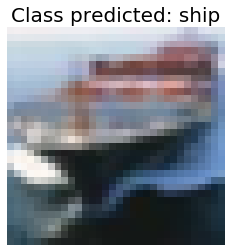

In [47]:
plt.imshow(X_test[random_image])
plt.title(f'Class predicted: {class_names[np.argmax(predictions)]}', fontdict={'fontsize':20})
plt.axis('off')

In [57]:
# requisição para versão especifica de um modelo
random_image = np.random.randint(0, len(X_test))
data = json.dumps({'signature_name': 'serving_default', 'instances': [X_test[random_image].tolist()]})
especific_json_response = requests.post(url= 'http://localhost:8501/v1/models/cifar10/versions/1:predict', data= data, headers= headers)
print(especific_json_response)

<Response [200]>

In [58]:
especific_predictions = json.loads(especific_json_response.text)['predictions']
print(especific_predictions)

[[0.0023699936,
  2.65863804e-07,
  1.66508107e-05,
  0.00357679417,
  4.03513894e-07,
  0.993905604,
  2.35010957e-05,
  4.63257038e-07,
  0.000101054065,
  5.39120811e-06]]

(-0.5, 31.5, 31.5, -0.5)

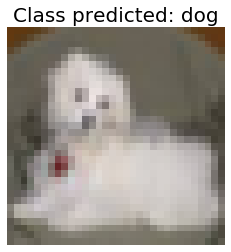

In [59]:
plt.imshow(X_test[random_image])
plt.title(f'Class predicted: {class_names[np.argmax(especific_predictions)]}', fontdict={'fontsize':20})
plt.axis('off')